In [1]:
%matplotlib qt

In [1]:
import networkx as nx
import xml.etree.ElementTree as ET
from pylab import *
import math

In [2]:
tree = ET.parse('map.osm')
root = tree.getroot()

$X = $ contains the x coordinates of all nodes  
$Y = $ contains the y coordinates of all nodes  
$d = $ dict which maps the node $id$ to the index of their value in X and Y  
$paths =$ contains all the $ways$ (paths) mentioned in osm referred to nodes' $id$s  
$G $ = graph which contains the nodes connected and distance from each node referred to $id$s

In [3]:
def checkroad(way):
    for nd in way:
        if(nd.tag == 'tag'):
            if(nd.attrib['k'] == "highway"):
                return True
                break
    return False

In [6]:
R = 6378000
X = []
Y = []
G = {}
i = 0
d = {}
paths = []
cou = 0
for child in root:
    #if(child.tag == 'node'):
    if(child.tag == 'node'):
        d[child.attrib['id']] = i
        lat = float(child.attrib['lat'])*pi/180
        lon = float(child.attrib['lon'])*pi/180
        x = R*cos(lat)*cos(lon)
        y = R*cos(lat)*sin(lon)
        X.append(x)
        Y.append(y)
        i = i+1
    if(child.tag == 'way'):
        path = []
        l = 0
        if(not checkroad(child)):
            continue
        for nd in child:
            if(nd.tag == 'nd'):
                path.append(nd.attrib['ref'])
                l = l+1
        paths.append(path)
        if(l <= 1):
            continue
        for k in range(l-1):
            cou += 1
            x1 = X[d[path[k]]]
            y1 = Y[d[path[k]]]
            x2 = X[d[path[k+1]]]
            y2 = Y[d[path[k+1]]]
            if(path[k] not in G):
                G[path[k]] = []
            if(path[k+1] not in G):
                G[path[k+1]] = []
            dst = sqrt((x2-x1)**2 + (y2-y1)**2)
            G[path[k]].append([path[k+1],dst])
            G[path[k+1]].append([path[k],dst])
print('Created the graph for the map in G')

Created the graph for the map in G


### Scatter plot of the given nodes

In [6]:
scatter(X,Y,s=0.5)
grid()
show()

### This block can be used to find the edge to which a node belongs to given the lat and lon of that node

12.990738,80.233741


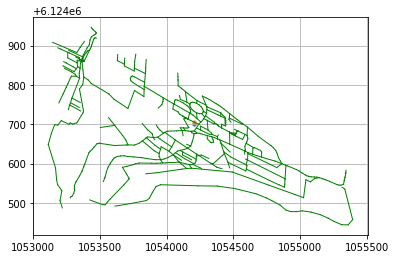

In [9]:
def findFoot(x,y,x1,y1,x2,y2):
    a = y2-y1; b = x1-x2
    c = y1*(x2-x1) - x1*(y2-y1)
    temp = -(a*x+b*y+c)/(a**2+b**2)
    return temp*a+x,temp*b+y
lat,lon = list(map(float,input().split(',')))
lat = lat*(pi/180); lon = lon*(pi/180); R = 6378000
x = R*cos(lat)*cos(lon)
y = R*sin(lon)*cos(lat)
mn = math.inf
for path in paths:
    l = len(path)
    for k in range(l-1):
        x1 = X[d[path[k]]]; y1 = Y[d[path[k]]]
        x2 = X[d[path[k+1]]]; y2 = Y[d[path[k+1]]]
        fx,fy = findFoot(x,y,x1,y1,x2,y2)
        if(fx >= min(x1,x2) and fx <= max(x1,x2)):
            dst = (x-fx)**2 + (y-fy)**2
            if(dst < mn):
                mn = dst; loc = [fx,fy]
        dst = (x-x1)**2 + (y-y1)**2
        if(dst < mn):
            mn = dst; loc = [x1,y1]
        dst = (x-x2)**2 + (y-y2)**2
        if(dst < mn):
            mn = dst; loc = [x2,y2]
        
        plot([x1,x2],[y1,y2],'-g',linewidth=1)
scatter(x,y,s=10)
scatter(loc[0],loc[1],s=10)
grid()
show()